In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import partial_dependence, permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [7]:
data = load_diabetes()

data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [9]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
y = pd.Series(data['target'])
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

In [14]:
X.shape, y.shape

((442, 10), (442,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=30,
    min_samples_leaf=2,
    random_state=42,
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       random_state=42)

[Text(0.51328125, 0.95, 'bmi <= -0.008\nentropy = 7.446\nsamples = 331\nvalue = [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0\n3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 4.0, 1.0, 1.0, 3.0\n2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0\n4.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0\n3.0, 2.0, 4.0, 1.0, 1.0, 3.0, 1.0, 1.0, 3.0, 2.0\n2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0\n4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0\n1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 4.0\n2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0\n1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0\n2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0\n2.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 3.0, 1.0, 3.0\n1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 5.0\n1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0\n2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0\n1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0\n2.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0\n1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 2.0\n1.0, 2.0, 1.0, 1.0,

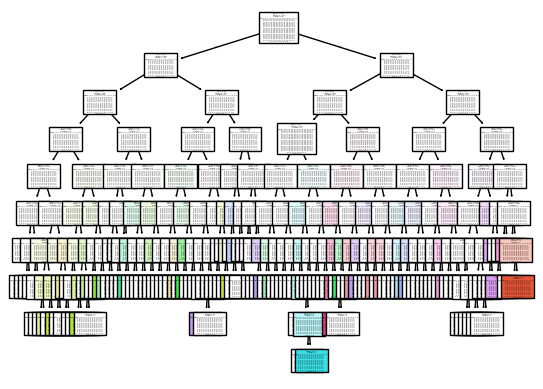

In [22]:
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[str(cls) for cls in data['target']],
    filled=True,
)

In [23]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

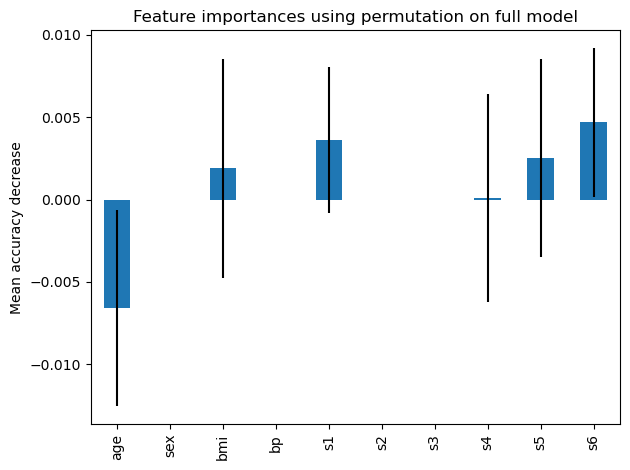

In [24]:
result = permutation_importance(dt, X_test, y_test, n_repeats=100, random_state=42)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()